### مدل سه ورودی (تلاش دوم)

##### وارد کردن کتابخانه های ضروری

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### وارد کردن دیتاست بعنوان دیتافریم پانداس

In [4]:
df = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/cleaned_dataset.csv')
#df.shape

##### جداسازی داده های ورودی و خروجی

In [6]:
X = df[['Power-Prop V', 'Depth1', 'Motor-FB']]  # سه ورودی
Y = df[['Power-Prop I']]   # یک خروجی

#### مقیاس بندی داده ها و تقسیم بندی

##### ایجاد شی مقیاس ساز

In [9]:
inputScaler = RobustScaler()
outputScaler = RobustScaler()

##### تنظیم مقیاس ساز ها و مقیاس بندی داده(نرمالسازی داده ها)

In [11]:
X_norm = inputScaler.fit_transform(X)
Y_norm = outputScaler.fit_transform(Y)

##### جداسازی و تقسیم بندی داده های تمرین و تست

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.2, random_state=42)

### ایجاد شبکه عصبی و تمرین دادن مدل

##### وارد کردن کتابخانه ها

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

##### ساختن شی و ایجاد شبکه عصبی با تابع

In [18]:
def create_model():
    inputs = tf.keras.Input(shape=(X_train.shape[1],))  

    layer_1 = layers.Dense(128, activation="leaky_relu", kernel_regularizer=regularizers.l2(0.001))(inputs)
    layer_1 = layers.Dropout(0.3)(layer_1)  # Dropout for regularization

    layer_2 = layers.Dense(64, activation="leaky_relu", kernel_regularizer=regularizers.l2(0.001))(layer_1)
    layer_2 = layers.Dropout(0.3)(layer_2)

    layer_3 = layers.Dense(32, activation="leaky_relu")(layer_2)

    output = layers.Dense(1, name='current_output')(layer_3)

    model = models.Model(inputs=inputs, outputs=output)
    return model

model_NN = create_model()

model_NN.compile(optimizer=AdamW(learning_rate=0.001),
              loss="mse",
              metrics=["mse"])

##### اضافه کردن توقف زودهنگام و تنظیم کننده نرخ یادگیری

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

##### تمرین دادن مدل

In [22]:
history = model_NN.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stop, lr_scheduler])

Epoch 1/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.1963 - mse: 0.1130 - val_loss: 0.0905 - val_mse: 0.0318 - learning_rate: 0.0010
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0878 - mse: 0.0355 - val_loss: 0.0673 - val_mse: 0.0310 - learning_rate: 0.0010
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0607 - mse: 0.0281 - val_loss: 0.0428 - val_mse: 0.0193 - learning_rate: 0.0010
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0432 - mse: 0.0220 - val_loss: 0.0342 - val_mse: 0.0183 - learning_rate: 0.0010
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0353 - mse: 0.0208 - val_loss: 0.0267 - val_mse: 0.0154 - learning_rate: 0.0010
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0302 - mse: 0.0196 - val_loss: 0.0235 - val_mse: 0.0148 - learning_rate: 0.0010
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0267 - mse: 0.0185 - val_loss: 0.0222 - val_mse: 0.0152 - learning_rate: 0.001

##### خلاصه اطلاعات شبکه عصبی ایجاد شده

In [24]:
model_NN.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ current_output (Dense)          │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,645 (127.52 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,764 (85.02 KB)

##### بررسی نمودار تابع زیان در مراحل تمرین دادن مدل

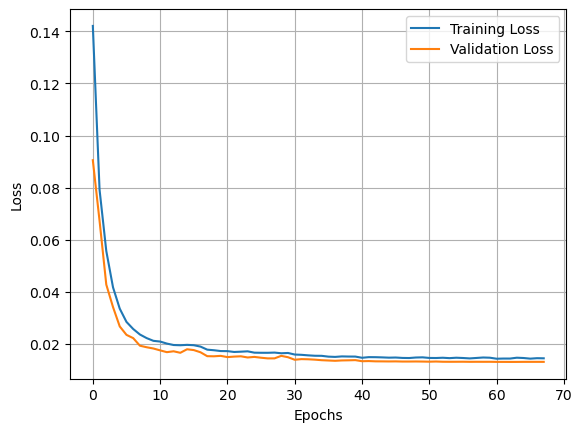

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
#plt.savefig("D:/AIjourney/newPics/Phase3/attempt1/Plots/lossPlot.png", format="png", dpi=300)
plt.show()

##### ارزیابی عملکرد و دقت مدل در پیشبینی

In [28]:
from sklearn.metrics import r2_score

##### ارزیابی با داده تست

In [30]:
prediction1 = model_NN.predict(X_test)
evalCurrent = r2_score(Y_test, prediction1)

print('Current prediction accuracy:',evalCurrent)

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Current prediction accuracy: 0.9676064722699151


##### ارزیابی با کل دیتاست

In [32]:
predTotal = model_NN.predict(X_norm)
evalCurrentTotal = r2_score(Y_norm, predTotal)

print('Current prediction accuracy(whole dataset):',evalCurrentTotal)

524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Current prediction accuracy(whole dataset): 0.9713801575326346


##### نمودار جریان واقعی و پیشبینی شده در دیتاست اصلی

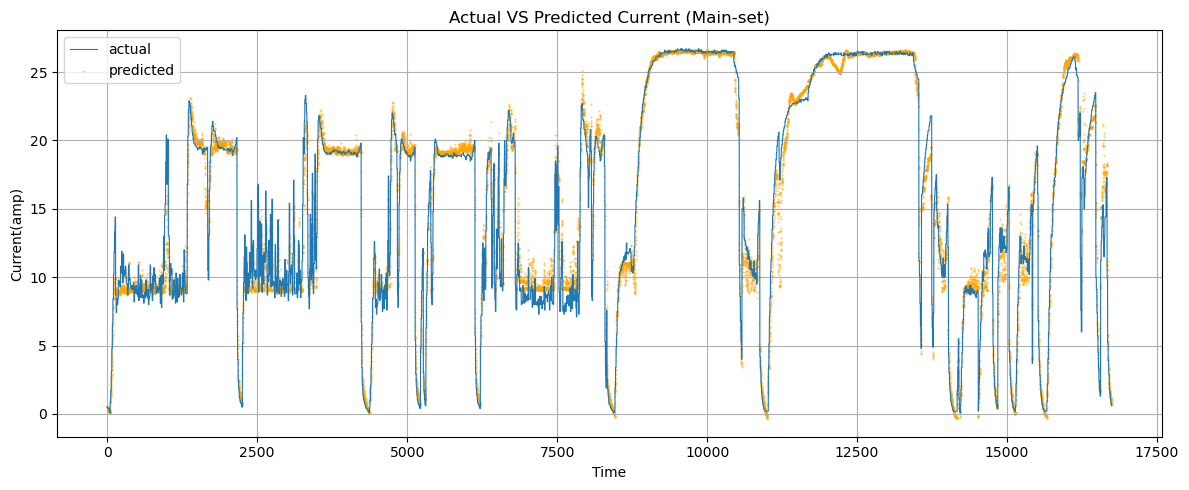

In [34]:
deNormPred = outputScaler.inverse_transform(predTotal)
timeLine = np.arange(0, 16744, 1)

plt.figure(figsize=(12,5))
plt.plot(timeLine, df['Power-Prop I'],label="actual", linewidth=0.8)
plt.scatter(timeLine, deNormPred,alpha=0.7,s=0.2,label="predicted", color="orange")
plt.title('Actual VS Predicted Current (Main-set)')
plt.ylabel('Current(amp)')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig("D:/AIjourney/newPics/Phase3/attempt1/Plots/currentMainSet.png", format="png", dpi=300)
plt.show()

### ارزیابی مدل با دیتاست ثانویه

##### وارد کردن دیتاست های ثانویه

In [37]:
dfTest1 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest1.csv')
dfTest2 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest2.csv')
dfTest3 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest3.csv')

##### جداسازی ورودی و خروجی بر روی دیتاست ها

In [39]:
test1_X = dfTest1[['Power-Prop V', 'Depth1', 'Motor-FB']]
test1_Y = dfTest1[['Power-Prop I']]

test2_X = dfTest2[['Power-Prop V', 'Depth1', 'Motor-FB']]
test2_Y = dfTest2[['Power-Prop I']]

test3_X = dfTest3[['Power-Prop V', 'Depth1', 'Motor-FB']]
test3_Y = dfTest3[['Power-Prop I']]

##### مقیاس بندی (نرمالسازی) ورودی های دیتاست های ثانویه با استفاده از مقیاس سازهای قبلی

In [41]:
test1_X_norm = inputScaler.transform(test1_X)
test2_X_norm = inputScaler.transform(test2_X)
test3_X_norm = inputScaler.transform(test3_X)

#test1_Y_norm = outputScaler.transform(test1_Y)
#test2_Y_norm = outputScaler.transform(test2_Y)
#test3_Y_norm = outputScaler.transform(test3_Y)

##### پیشبینی مقادیر جریان با استفاده از ورودی ها

In [43]:
predTest1 = model_NN.predict(test1_X_norm)
predTest2 = model_NN.predict(test2_X_norm)
predTest3 = model_NN.predict(test3_X_norm)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


##### لغو مقیاس بندی و تبدیل معکوس داده های پیشبینی شده توسط مدل

In [45]:
predTest1_deNorm = outputScaler.inverse_transform(predTest1)
predTest2_deNorm = outputScaler.inverse_transform(predTest2)
predTest3_deNorm = outputScaler.inverse_transform(predTest3)

##### محاسبه و ارزیابی دقت پیشبینی بر روی هر سه دیتاست ثانویه

In [47]:
print('Current accuracy test1:',r2_score(test1_Y['Power-Prop I'], predTest1_deNorm))
print('\n')
print('Current accuracy test2:',r2_score(test2_Y['Power-Prop I'], predTest2_deNorm))
print('\n')
print('Current accuracy test3:',r2_score(test3_Y['Power-Prop I'], predTest3_deNorm))

Current accuracy test1: 0.921059528916942


Current accuracy test2: 0.8635057694308346


Current accuracy test3: 0.9419553247272169


##### مصورسازی جریان واقعی و تخمین زده شده توسط مدل

###### تغییر نوع داده خروجی دیتاست ها به آرایه چند بعدی برای استفاده در مصورسازی

In [50]:
test1_Ynp = np.array(test1_Y)
test2_Ynp = np.array(test2_Y)
test3_Ynp = np.array(test3_Y)

##### تولید نمودار به ازای هر دیتاست ثانویه

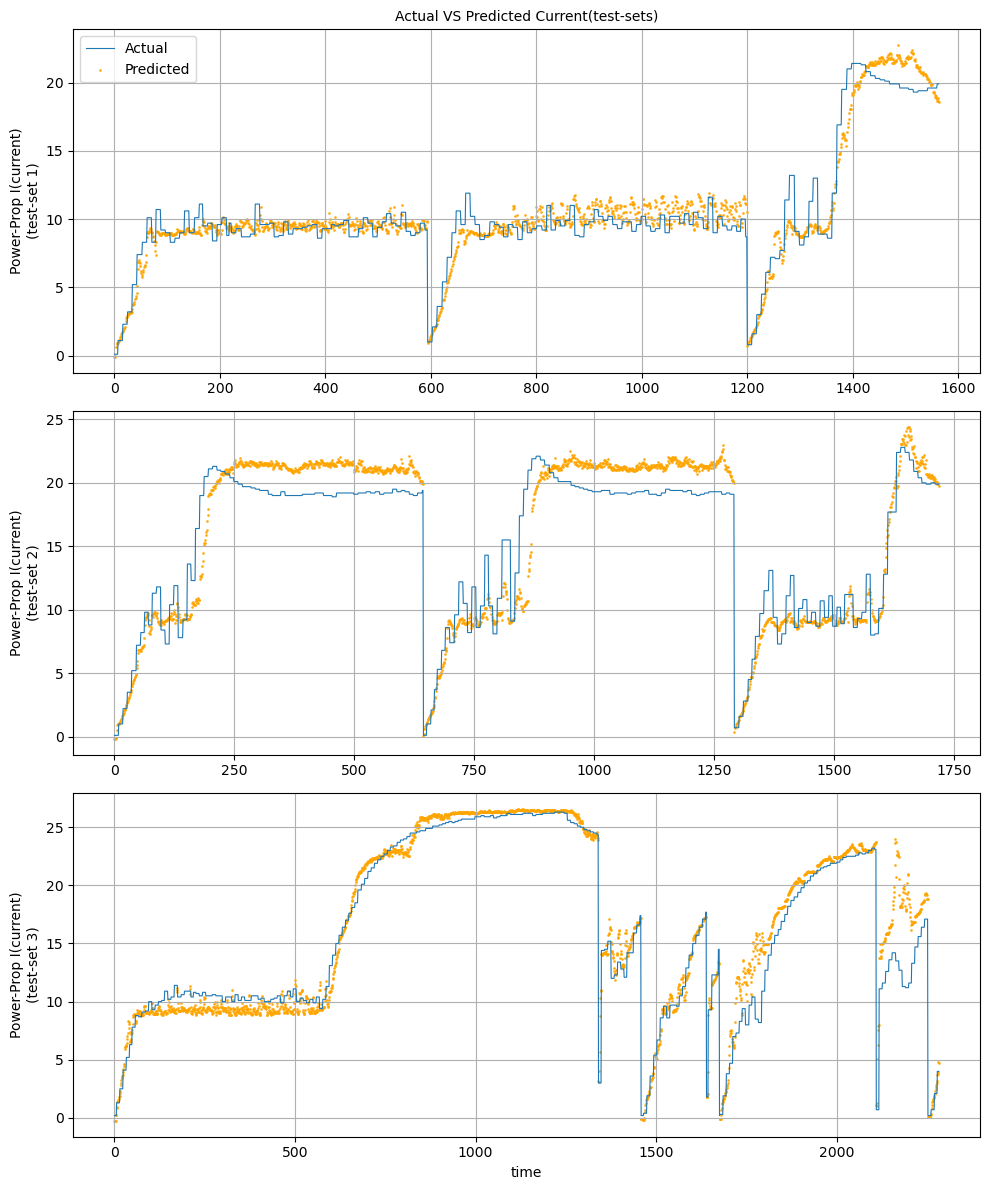

In [52]:
time1 = np.arange(0,1564,1)
time2 = np.arange(0,1719,1)
time3 = np.arange(0,2283,1)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

axes[0].plot(time1,test1_Ynp,linewidth=0.8, label='Actual')
axes[0].scatter(time1,predTest1_deNorm,alpha=0.8,s=1,label='Predicted',color='orange')
axes[0].set_ylabel('Power-Prop I(current)\n(test-set 1)',fontsize=10)
axes[0].set_title('Actual VS Predicted Current(test-sets)',fontsize=10)
axes[0].grid(True)

axes[1].plot(time2,test2_Ynp,linewidth=0.8)
axes[1].scatter(time2,predTest2_deNorm,alpha=0.8,s=1,color='orange')
axes[1].set_ylabel('Power-Prop I(current)\n(test-set 2)',fontsize=10)
axes[1].grid(True)


axes[2].plot(time3,test3_Ynp,linewidth=0.8)
axes[2].scatter(time3,predTest3_deNorm,alpha=0.8,s=1,color='orange')
axes[2].set_ylabel('Power-Prop I(current)\n(test-set 3)',fontsize=10)
axes[2].set_xlabel('time',fontsize=10)
axes[2].grid(True)


plt.tight_layout()
axes[0].legend()
#plt.savefig("D:/AIjourney/newPics/Phase3/attempt1/Plots/currentTestSet.png", format="png", dpi=300)
plt.show()

#### ذخیره سازی مدل و مقیاس سازها

In [54]:
import joblib

##### ذخیره کردن مقیاس سازها

In [56]:
joblib.dump(inputScaler, "D:/AIjourney/NN_Models/Phase3/attempt1/scalers/inputScaler.pkl")
joblib.dump(outputScaler, "D:/AIjourney/NN_Models/Phase3/attempt1/scalers/outputScaler.pkl")

#### ذخیره کردن شبکه عصبی

##### h5 ذخیره سازی با فرمت

In [59]:
model_NN.save("D:/AIjourney/NN_Models/Phase3/attempt1/BLDC_Neural_Network_Model.h5")

##### keras ذخیره سازی با فرمت

In [61]:
model_NN.save("D:/AIjourney/NN_Models/Phase3/attempt1/BLDC_Neural_Network_Model.keras")